In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt 
import seaborn as sns

total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv", sep = ",")
total_data.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2


In [39]:
total_data.isnull().sum().sort_values(ascending=False) / len(total_data)

fips                      0.0
TOT_POP                   0.0
0-9                       0.0
0-9 y/o % of total pop    0.0
19-Oct                    0.0
                         ... 
CKD_prevalence            0.0
CKD_Lower 95% CI          0.0
CKD_Upper 95% CI          0.0
CKD_number                0.0
Urban_rural_code          0.0
Length: 108, dtype: float64

In [40]:
data_types = total_data.dtypes
numeric_columns = [c for c in list(data_types[data_types != "object"].index) if c != "diabetes_number"]


In [41]:
X = total_data[numeric_columns]
y = total_data["diabetes_number"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_Upper 95% CI,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
1292,26127,26625,3221,12.097653,3463,13.006573,2922,10.974648,2829,10.625352,...,13.0,2314,13.7,12.6,14.9,3.8,3.5,4.1,771,6
2302,42121,51266,5272,10.283619,5751,11.217961,5137,10.020286,5341,10.418211,...,11.5,4097,13.1,11.9,14.2,3.5,3.2,3.8,1454,5
761,18133,37779,3915,10.362900,5118,13.547209,6202,16.416528,4363,11.548744,...,10.4,2792,12.2,11.2,13.1,2.9,2.7,3.1,871,2
2194,40131,91984,11163,12.135806,12646,13.748043,11595,12.605453,11357,12.346712,...,9.3,5716,11.2,10.4,12.0,3.0,2.8,3.2,2118,3
1241,26025,134487,16698,12.416070,17666,13.135842,17281,12.849569,15993,11.891856,...,11.0,10002,12.5,11.7,13.4,3.4,3.2,3.6,3490,4


In [42]:
scaler = StandardScaler() 
scaler.fit(X_train)

X_train_norm = scaler.transform(X_train)
X_train_norm = pd.DataFrame(X_train_norm, index = X_train.index, columns = X.columns)

X_test_norm = scaler.transform(X_test)
X_test_norm = pd.DataFrame(X_test_norm, index = X_test.index, columns = X.columns)

X_train_norm.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_Upper 95% CI,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
1292,-0.301633,-0.229763,-0.225393,0.102383,-0.231350,0.162374,-0.229775,-0.429454,-0.223780,-0.665485,...,0.989521,-0.222477,0.244361,0.209312,0.314479,0.644725,0.576430,0.657452,-0.216950,0.910528
2302,0.761573,-0.161280,-0.179851,-0.754597,-0.181109,-0.836073,-0.188375,-0.736296,-0.176225,-0.785934,...,0.413368,-0.117073,0.021661,-0.060621,0.064137,0.109985,0.000382,0.161947,-0.135212,0.249092
761,-0.833037,-0.198764,-0.209983,-0.717144,-0.195009,0.464170,-0.168470,1.320194,-0.194740,-0.128551,...,-0.009144,-0.194220,-0.312388,-0.330555,-0.329256,-0.959495,-0.959698,-0.994232,-0.204982,-1.735217
2194,0.629287,-0.048115,-0.049041,0.120407,-0.029705,0.576280,-0.067671,0.094875,-0.062335,0.335452,...,-0.431656,-0.021363,-0.683554,-0.639050,-0.722650,-0.781249,-0.767682,-0.829064,-0.055748,-1.073780
1241,-0.308413,0.070012,0.073864,0.252809,0.080526,0.234535,0.038603,0.173362,0.025430,0.070962,...,0.221317,0.232009,-0.201038,-0.137745,-0.221967,-0.068262,0.000382,-0.168390,0.108446,-0.412344


In [43]:
k = int(len(X_train_norm.columns) * 0.3)
selection_model = SelectKBest(score_func = f_classif, k = k)
selection_model.fit(X_train_norm, y_train)
ix = selection_model.get_support()

X_train_sel = pd.DataFrame(selection_model.transform(X_train_norm), columns = X_train_norm.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test_norm), columns = X_test_norm.columns.values[ix])

X_train_sel.head()

,TOT_POP,0-9,19-Oct,30-39,40-49,50-59,60-69,70-79,80+,White-alone pop,...,Internal Medicine Primary Care (2019),Total Specialist Physicians (2019),Total Population,Population Aged 60+,county_pop2018_18 and older,anycondition_number,Obesity_number,Heart disease_number,COPD_number,CKD_number
0,-0.229763,-0.225393,-0.231350,-0.223780,-0.228216,-0.227030,-0.231375,-0.232151,-0.231665,-0.227350,...,-0.200241,-0.208077,-0.228413,-0.227824,-0.230288,-0.231574,-0.230636,-0.224232,-0.222477,-0.216950
1,-0.161280,-0.179851,-0.181109,-0.176225,-0.163303,-0.139120,-0.112664,-0.124916,-0.099555,-0.132168,...,-0.106092,-0.117282,-0.153492,-0.106368,-0.155864,-0.146243,-0.158219,-0.121664,-0.117073,-0.135212
2,-0.198764,-0.209983,-0.195009,-0.194740,-0.193726,-0.199360,-0.218215,-0.220562,-0.204552,-0.188513,...,-0.221406,-0.216510,-0.196750,-0.215126,-0.195032,-0.193279,-0.201734,-0.215308,-0.194220,-0.204982
3,-0.048115,-0.049041,-0.029705,-0.062335,-0.044847,-0.033104,-0.044844,-0.036279,-0.057310,-0.055730,...,-0.152617,-0.114531,-0.048519,-0.042488,-0.051170,-0.016632,-0.007673,-0.021238,-0.021363,-0.055748
4,0.070012,0.073864,0.080526,0.025430,0.048850,0.079829,0.119807,0.116625,0.139396,0.102245,...,0.145565,0.166754,0.076228,0.135093,0.067785,0.140471,0.156960,0.169262,0.232009,0.108446


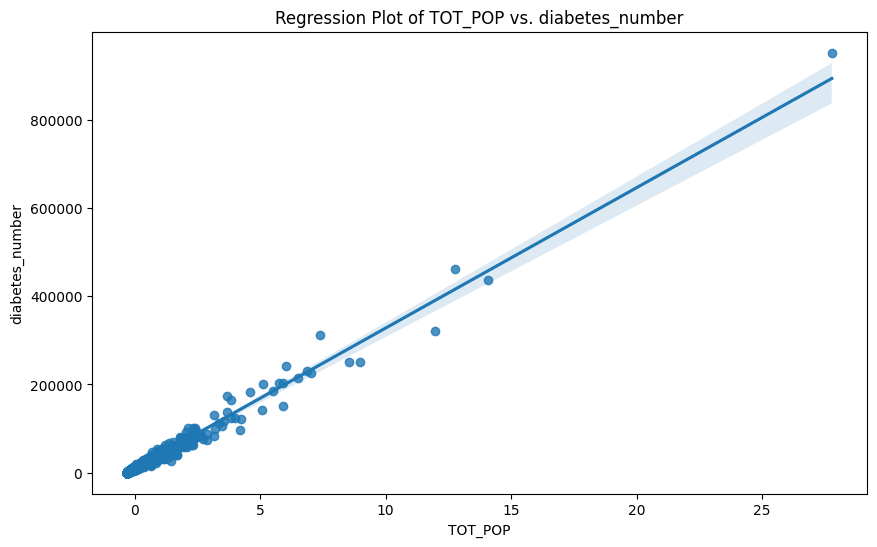

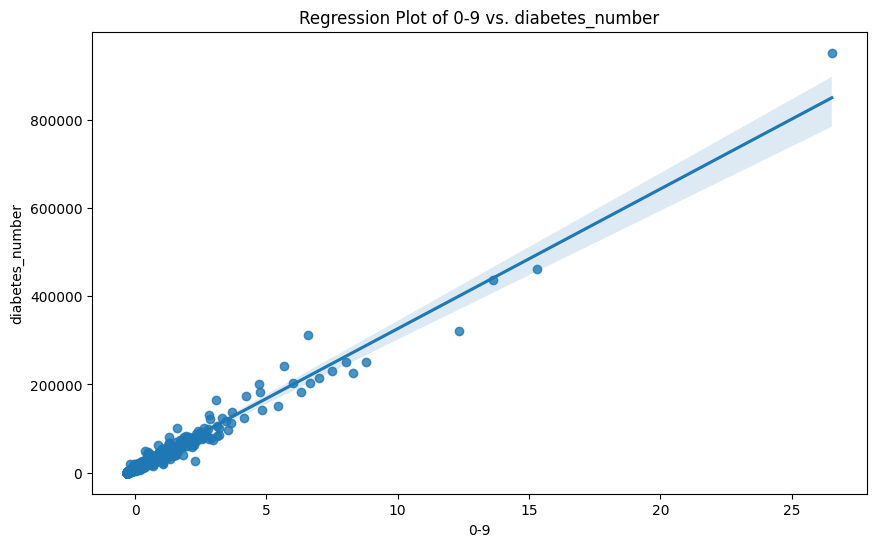

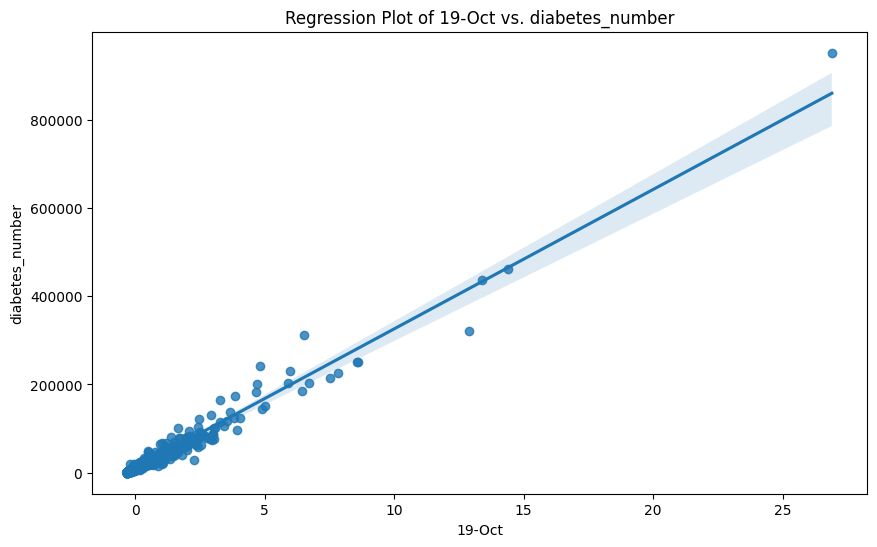

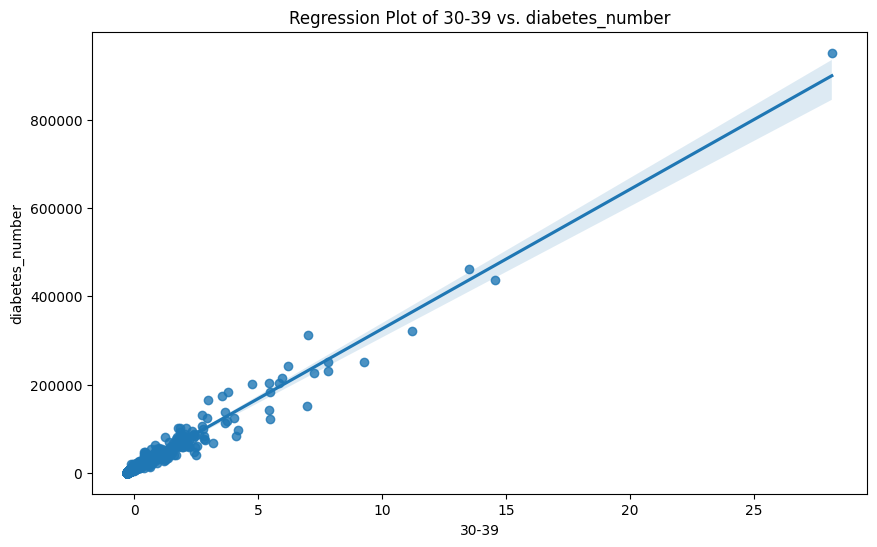

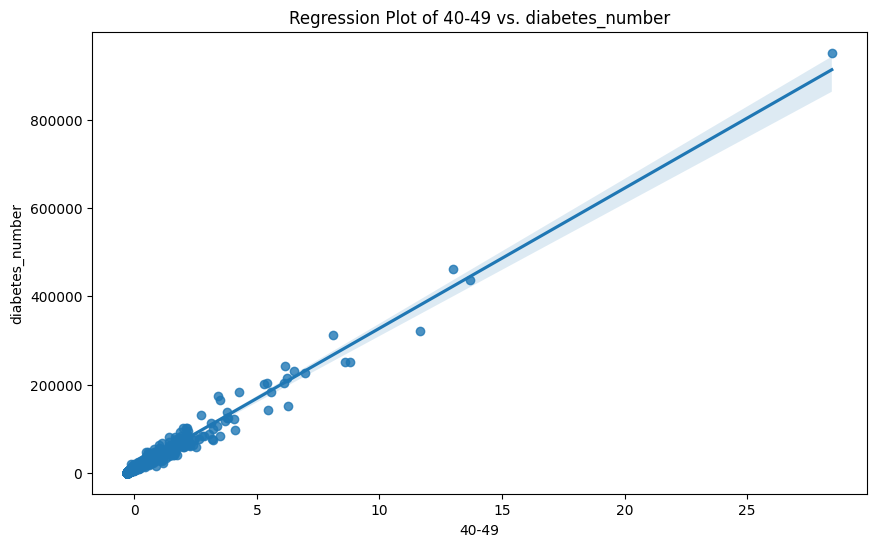

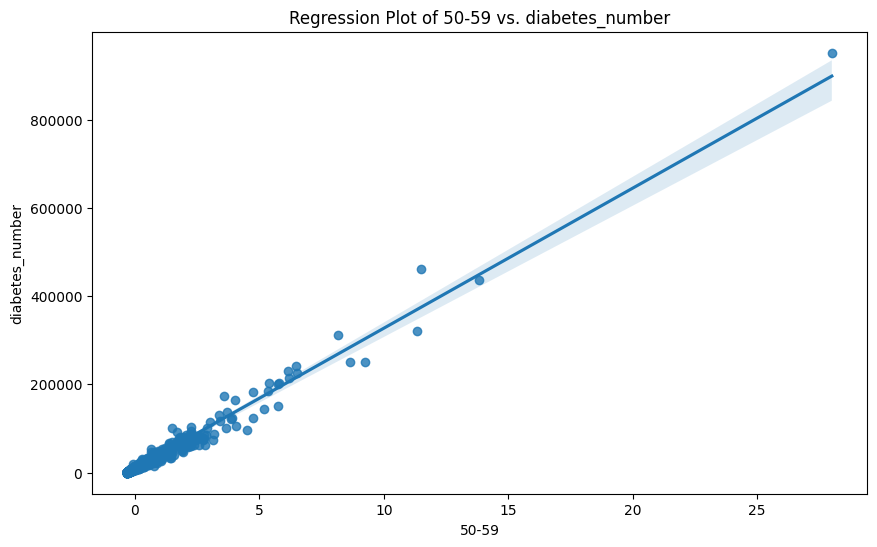

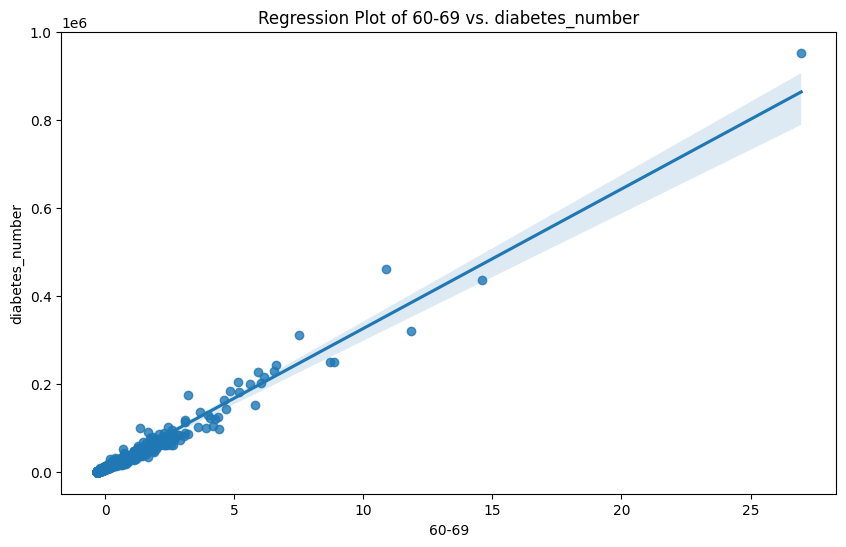

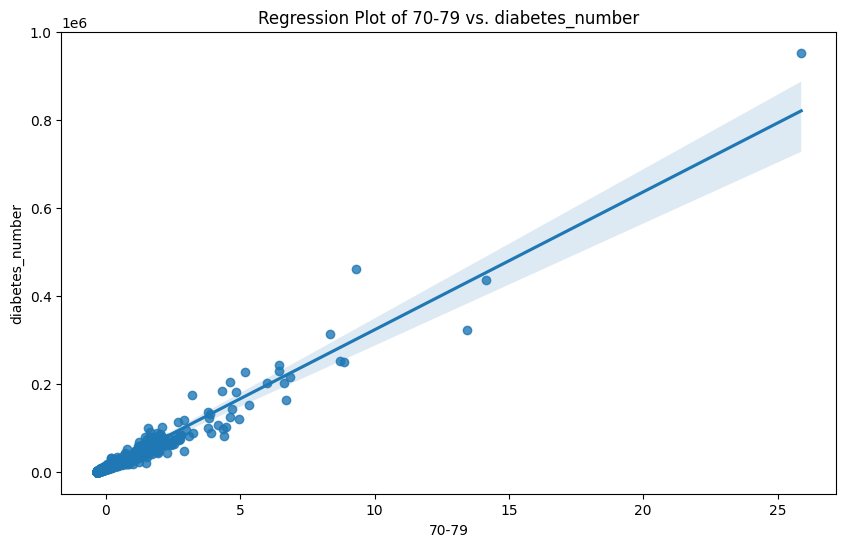

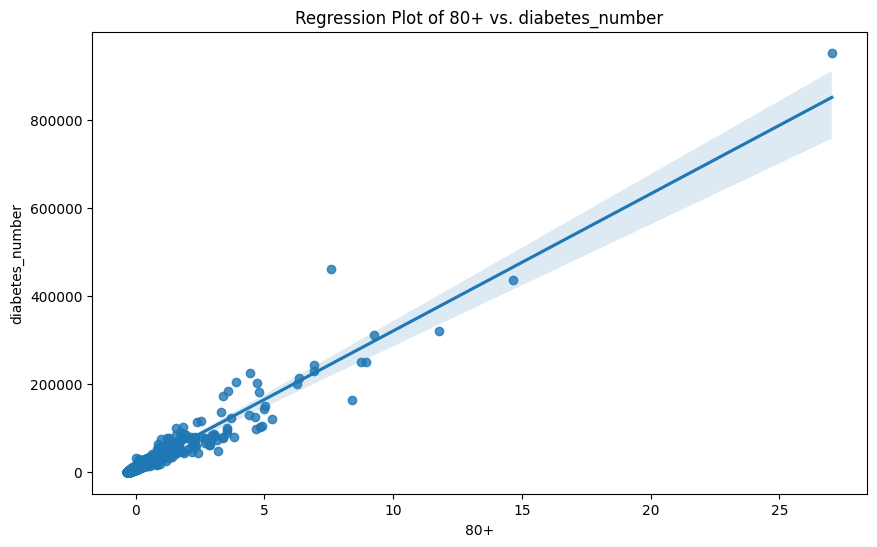

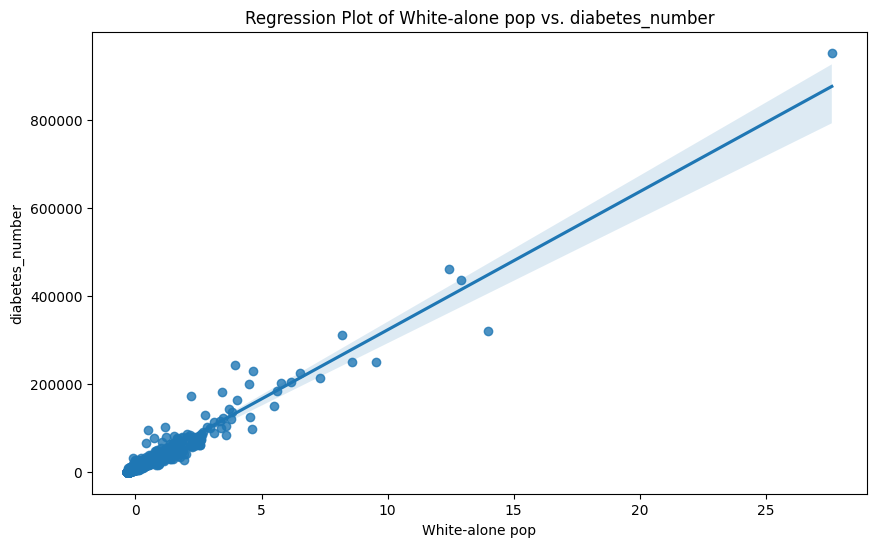

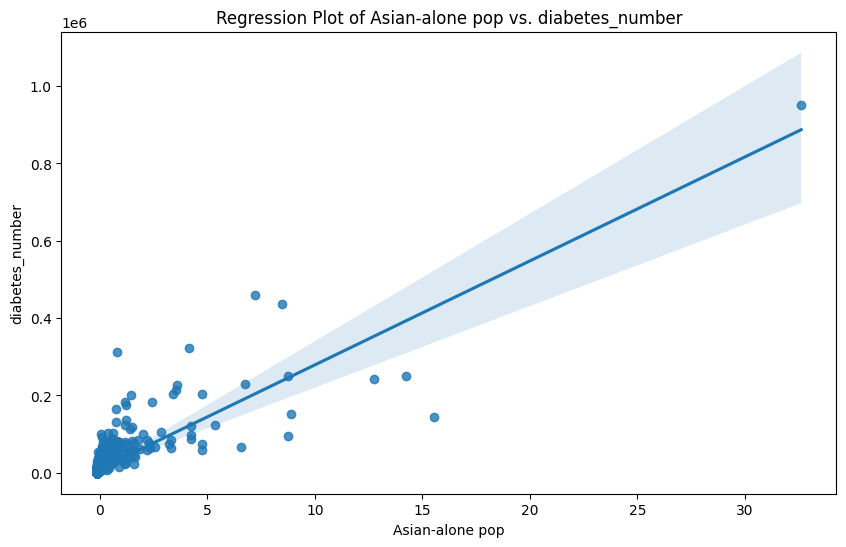

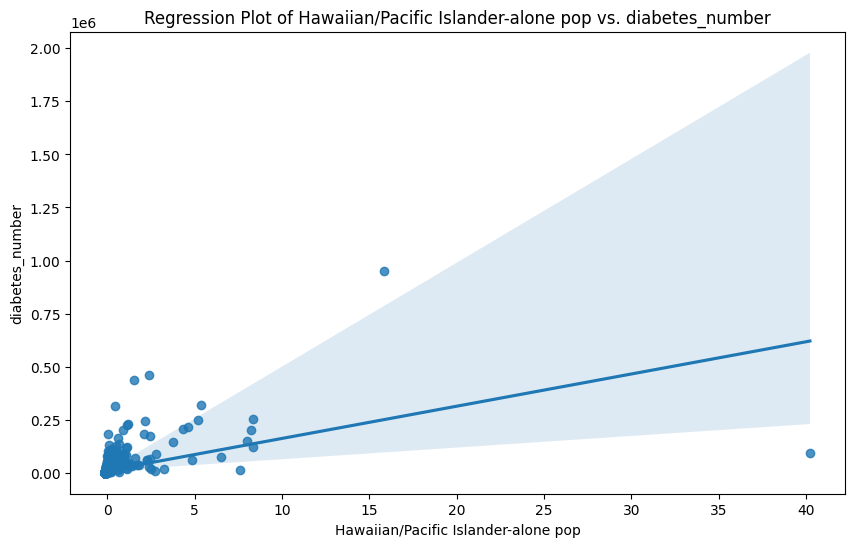

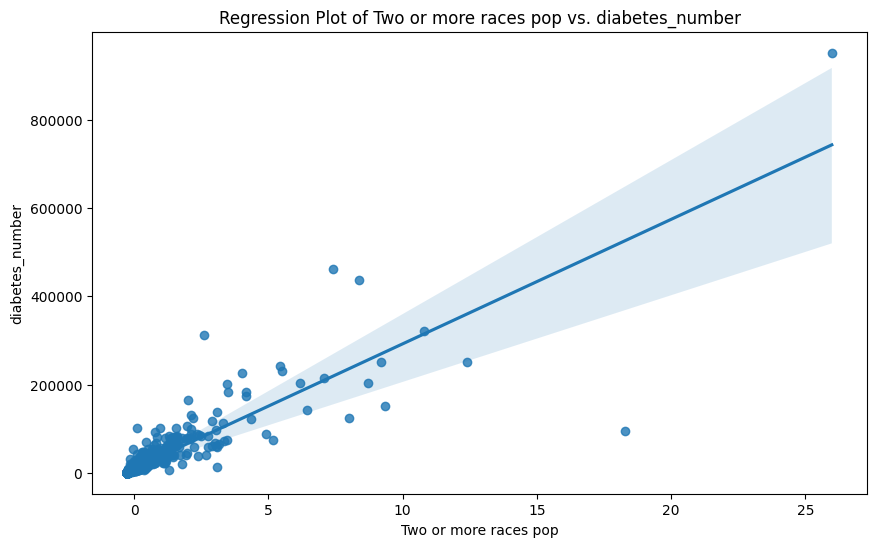

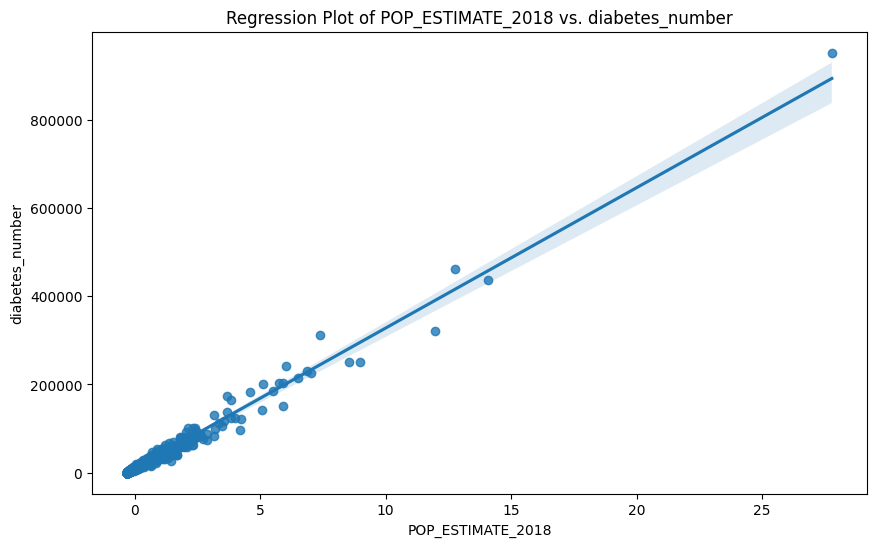

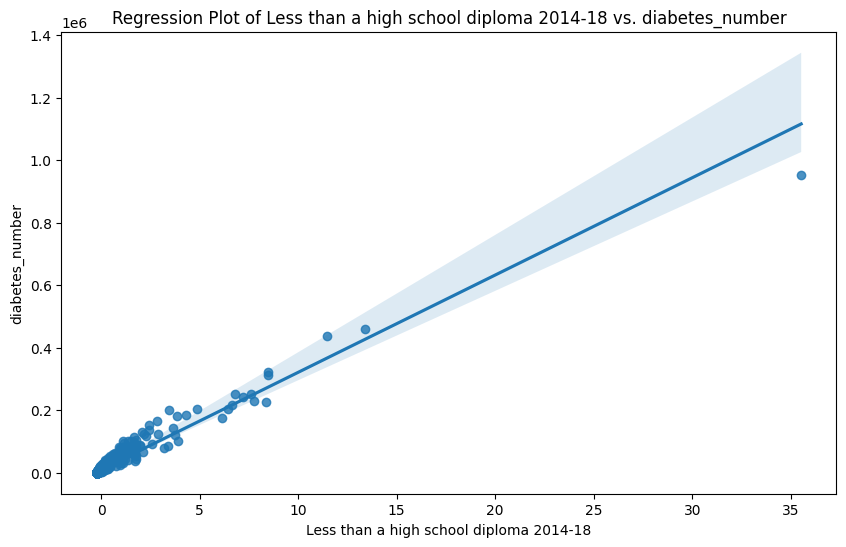

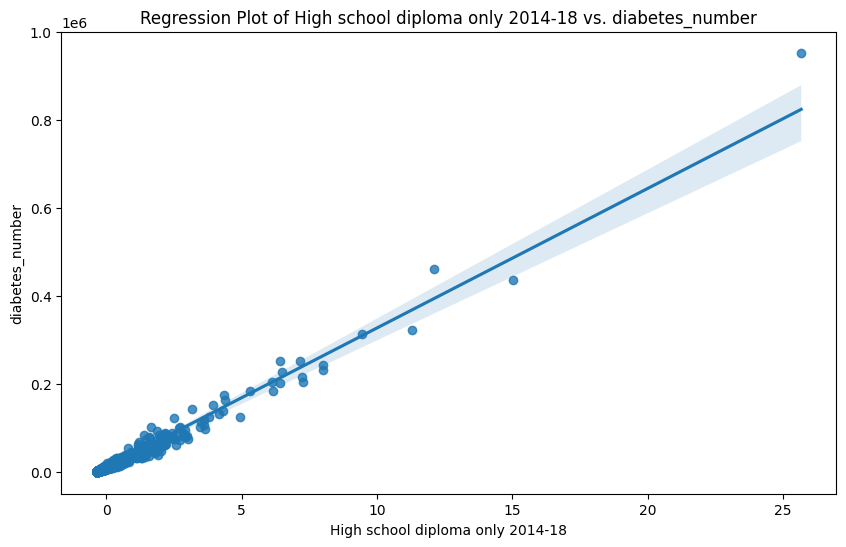

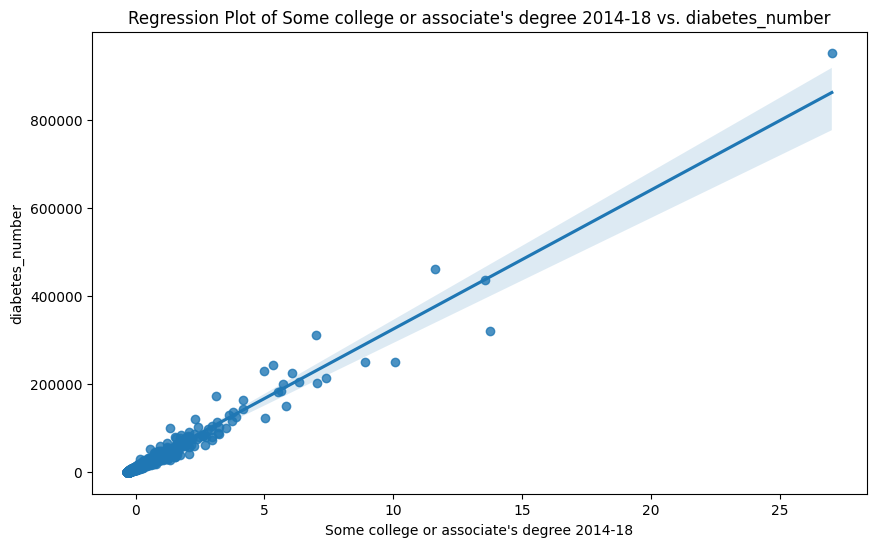

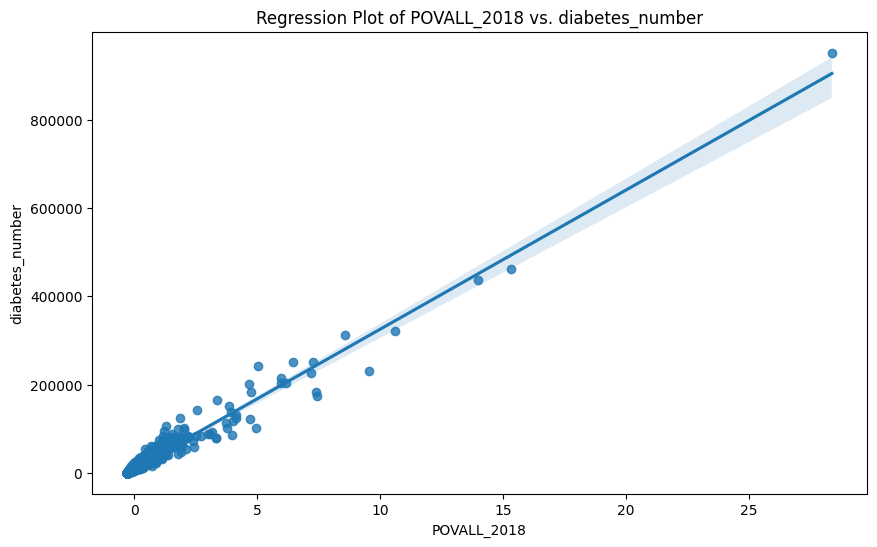

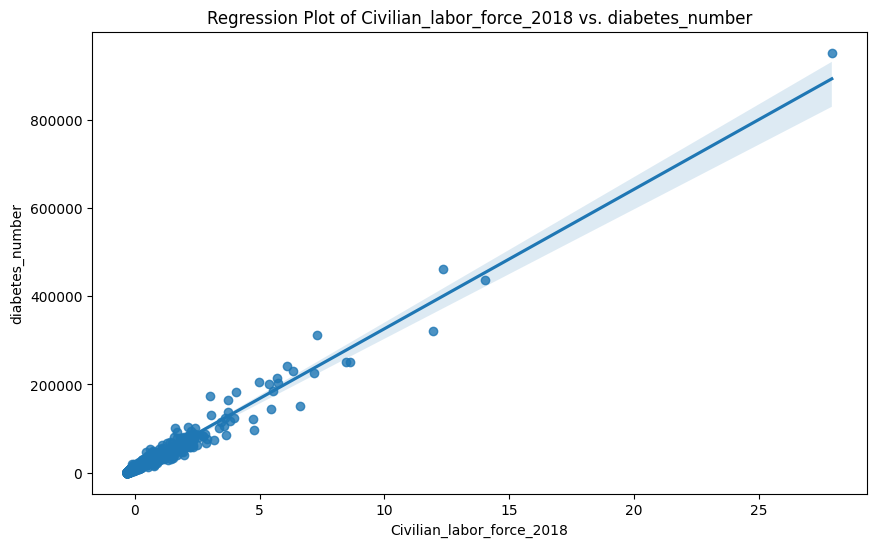

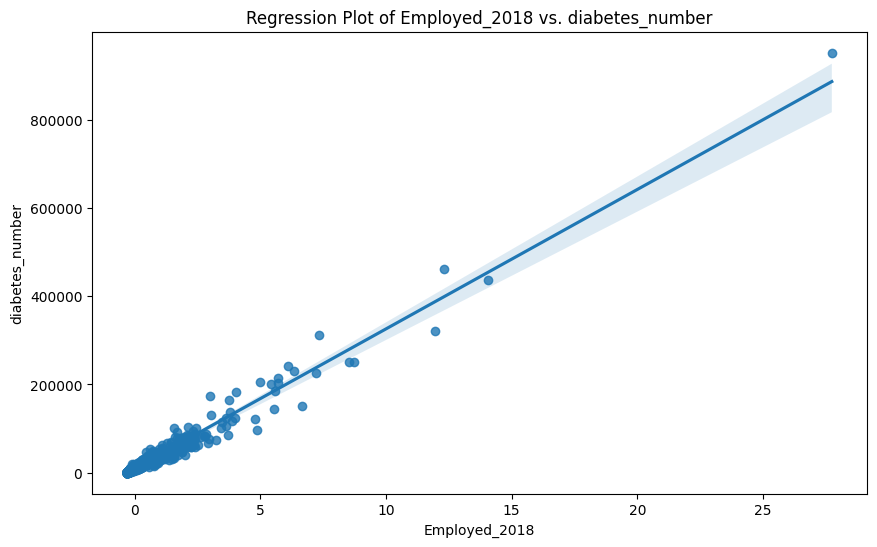

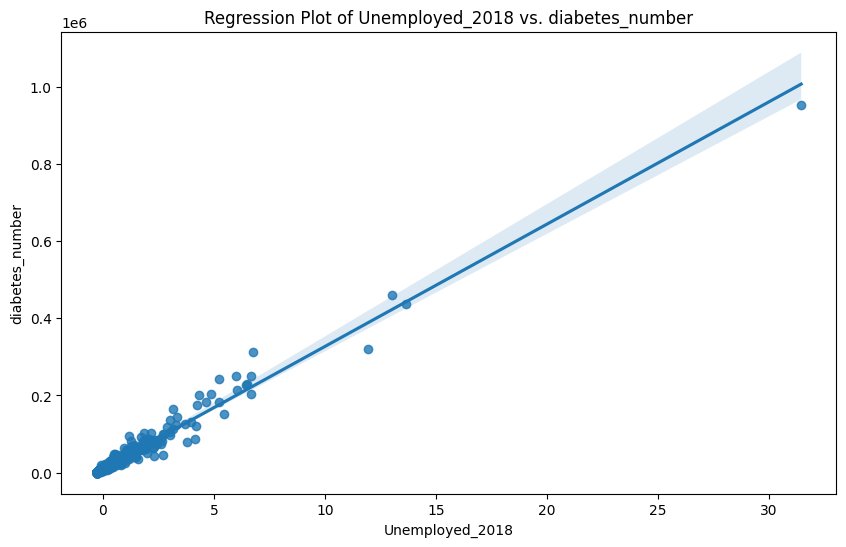

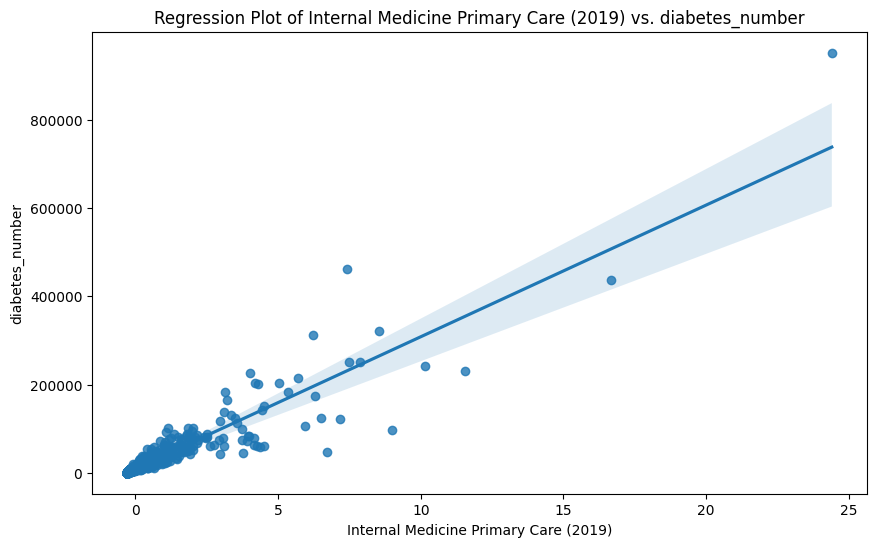

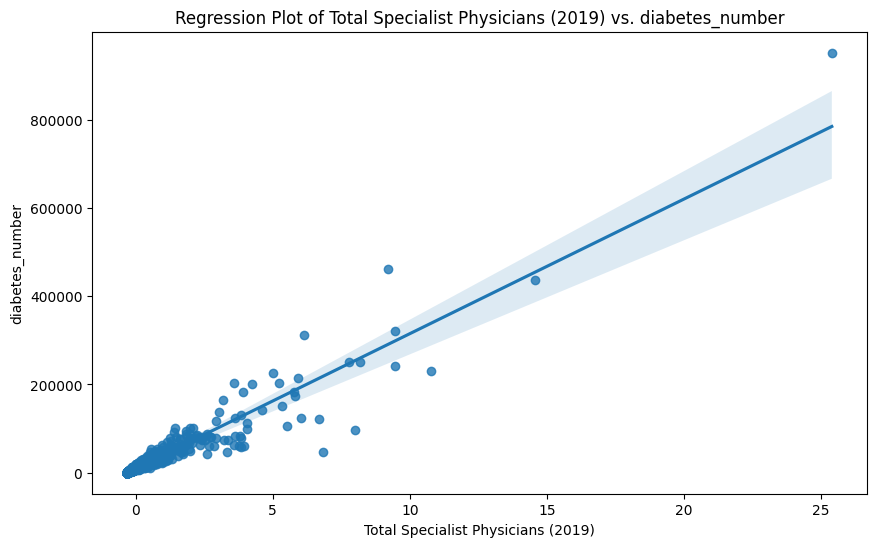

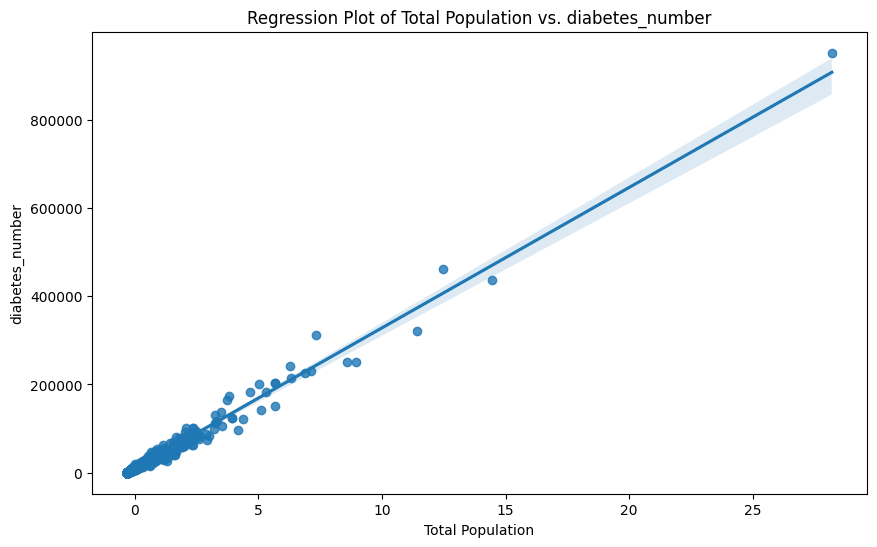

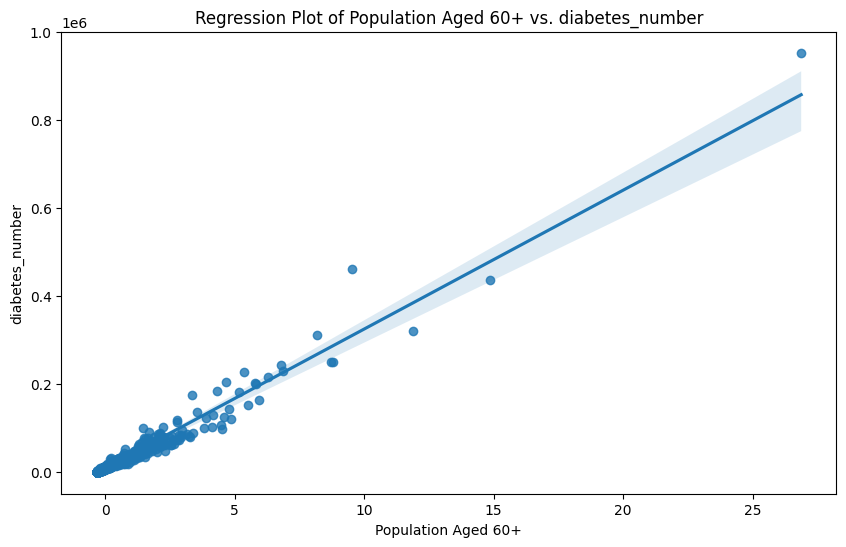

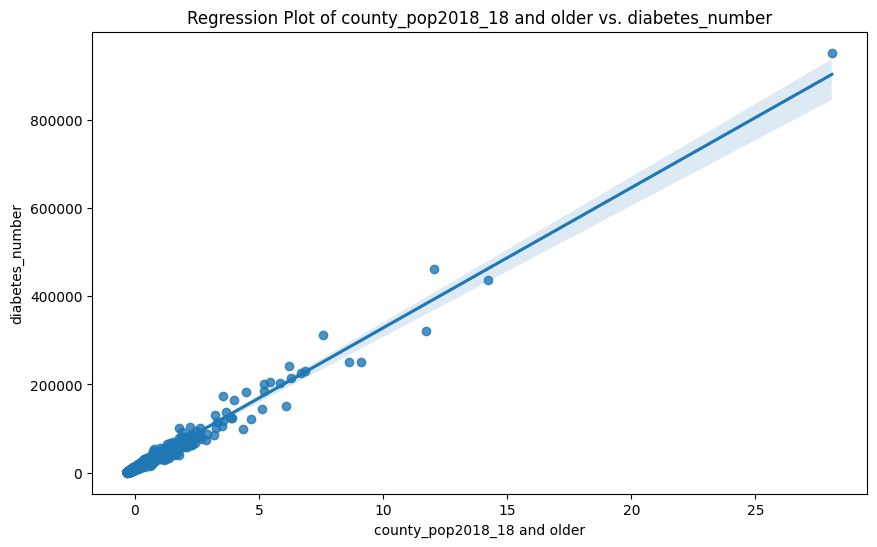

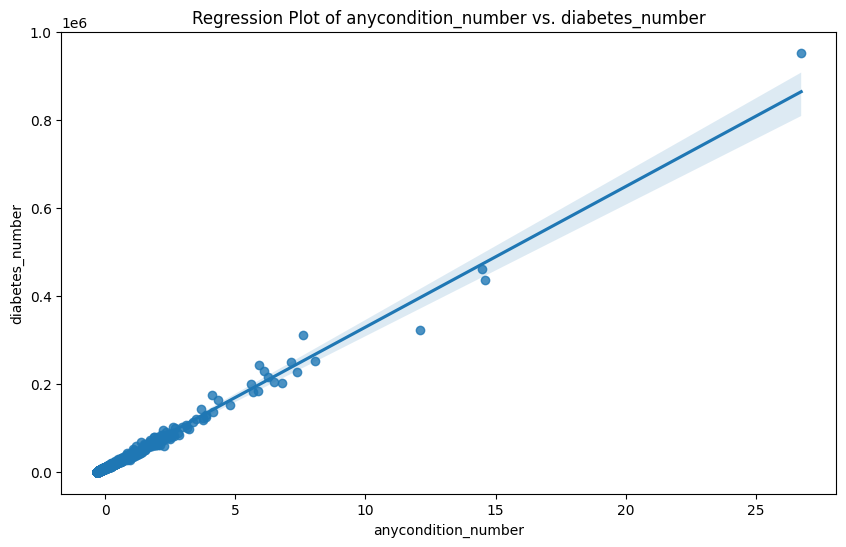

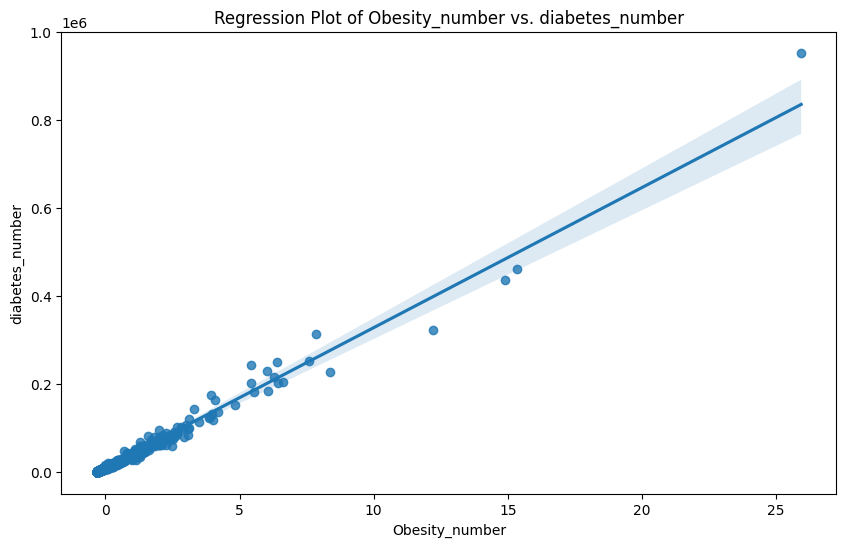

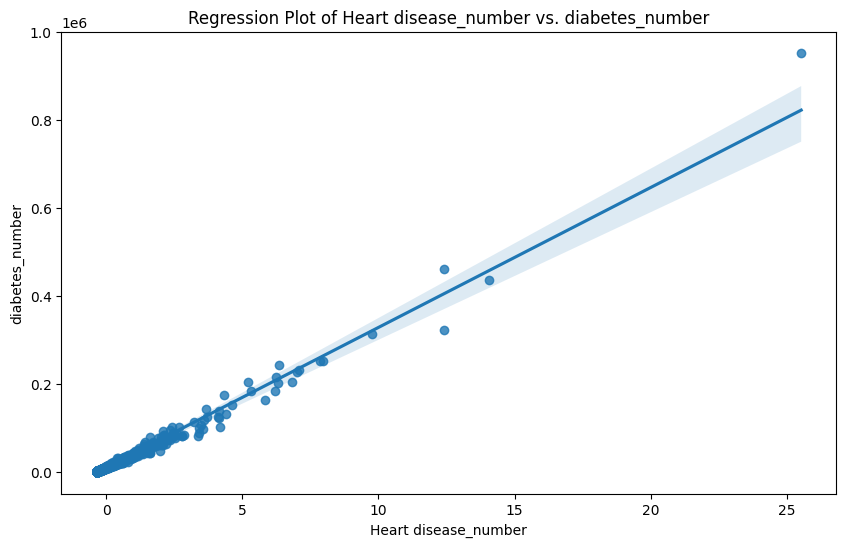

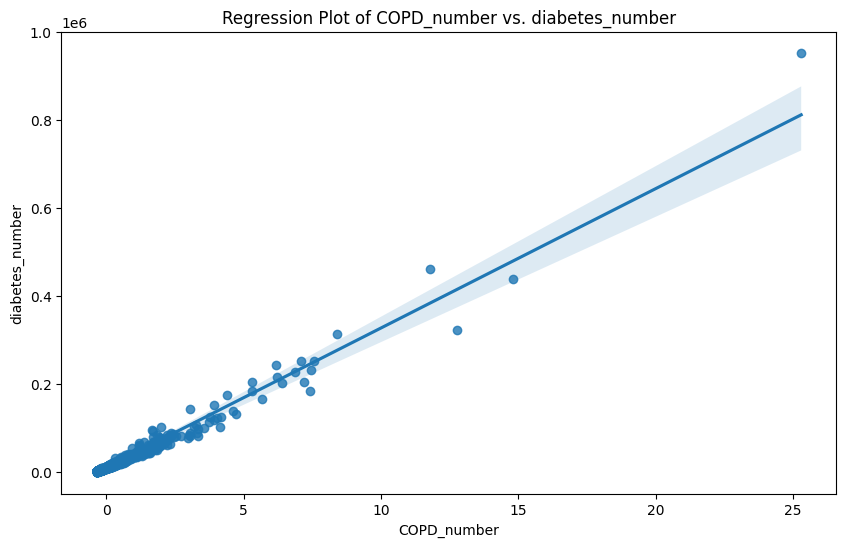

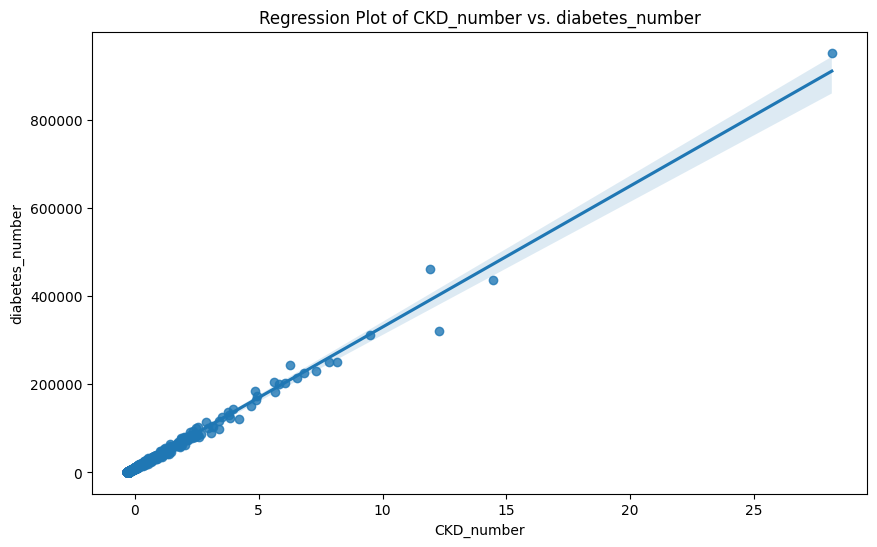

In [44]:
X_train_sel["diabetes_number"] = list(y_train)
X_test_sel["diabetes_number"] = list(y_test)

X_train_sel.to_csv("train.csv", index = False)
X_test_sel.to_csv("test.csv", index = False)

for column in X_train_sel.columns:
    if column != "diabetes_number":  # Exclude the target variable itself
        plt.figure(figsize=(10, 6))
        sns.regplot(x=X_train_sel[column], y=X_train_sel["diabetes_number"])
        plt.title(f'Regression Plot of {column} vs. diabetes_number')
        plt.xlabel(column)
        plt.ylabel('diabetes_number')
        plt.show()



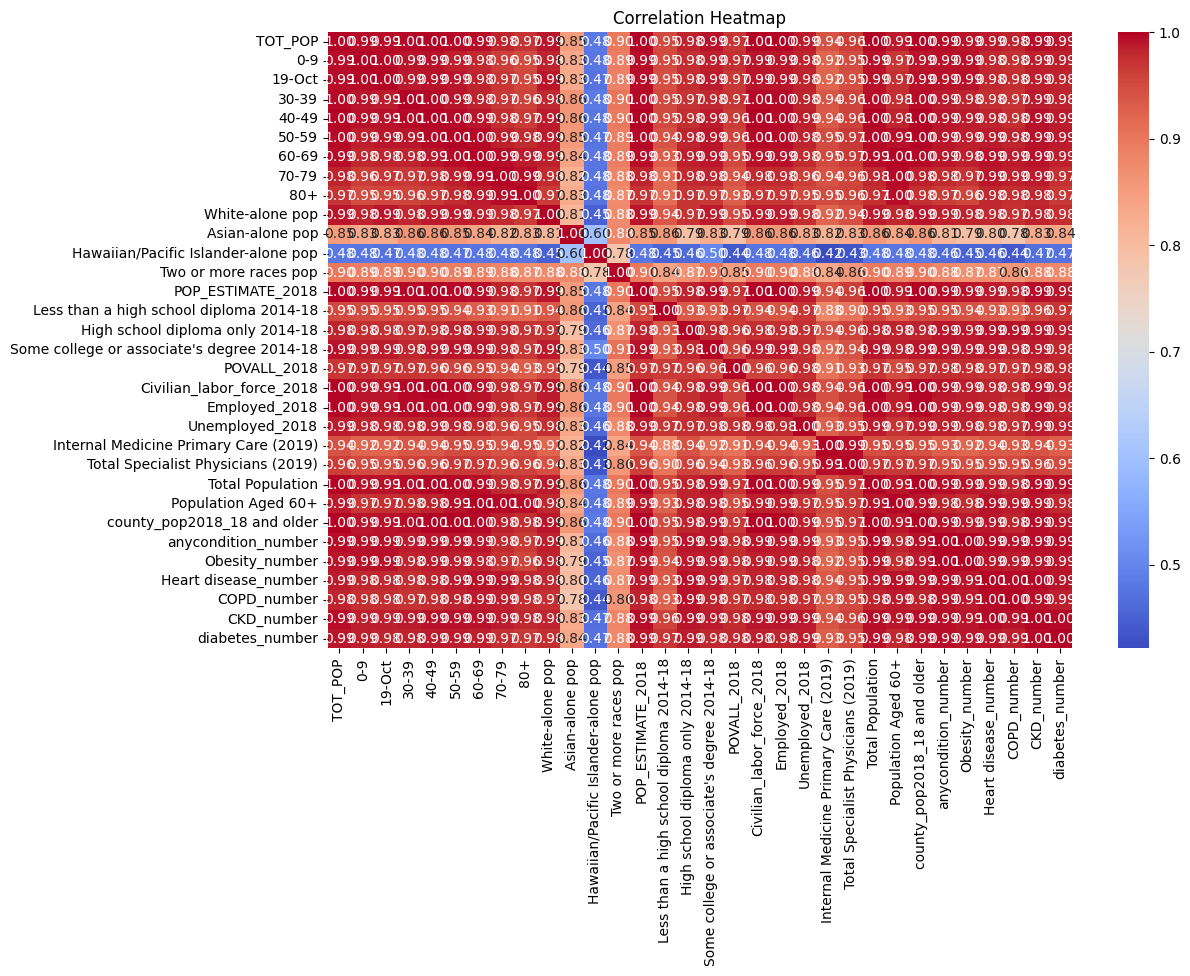

In [45]:
plt.figure(figsize=(12, 8))
correlation_matrix = X_train_sel.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [46]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

train_data.head()

,TOT_POP,0-9,19-Oct,30-39,40-49,50-59,60-69,70-79,80+,White-alone pop,...,Total Specialist Physicians (2019),Total Population,Population Aged 60+,county_pop2018_18 and older,anycondition_number,Obesity_number,Heart disease_number,COPD_number,CKD_number,diabetes_number
0,-0.229763,-0.225393,-0.231350,-0.223780,-0.228216,-0.227030,-0.231375,-0.232151,-0.231665,-0.227350,...,-0.208077,-0.228413,-0.227824,-0.230288,-0.231574,-0.230636,-0.224232,-0.222477,-0.216950,2823
1,-0.161280,-0.179851,-0.181109,-0.176225,-0.163303,-0.139120,-0.112664,-0.124916,-0.099555,-0.132168,...,-0.117282,-0.153492,-0.106368,-0.155864,-0.146243,-0.158219,-0.121664,-0.117073,-0.135212,5416
2,-0.198764,-0.209983,-0.195009,-0.194740,-0.193726,-0.199360,-0.218215,-0.220562,-0.204552,-0.188513,...,-0.216510,-0.196750,-0.215126,-0.195032,-0.193279,-0.201734,-0.215308,-0.194220,-0.204982,3698
3,-0.048115,-0.049041,-0.029705,-0.062335,-0.044847,-0.033104,-0.044844,-0.036279,-0.057310,-0.055730,...,-0.114531,-0.048519,-0.042488,-0.051170,-0.016632,-0.007673,-0.021238,-0.021363,-0.055748,7913
4,0.070012,0.073864,0.080526,0.025430,0.048850,0.079829,0.119807,0.116625,0.139396,0.102245,...,0.166754,0.076228,0.135093,0.067785,0.140471,0.156960,0.169262,0.232009,0.108446,12987


In [47]:
X_train = train_data.drop(["diabetes_number"], axis = 1)
y_train = train_data["diabetes_number"]
X_test = test_data.drop(["diabetes_number"], axis = 1)
y_test = test_data["diabetes_number"]

model = LogisticRegression()
model.fit(X_train, y_train)

#print(y_test)

/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [48]:
print(f"Intercep (a): {model.intercept_}")
print(f"Coefficients: {model.coef_}")

Intercep (a): [-0.32888999 -0.32794544 -0.3273609  ... -2.65446966 -2.44572528
 -2.10559754]
Coefficients: [[-0.07479471 -0.07039074 -0.07664153 ... -0.10954067 -0.11954509
  -0.0856564 ]
 [-0.0750636  -0.07114603 -0.07738743 ... -0.10942182 -0.11968257
  -0.08546819]
 [-0.07461977 -0.07037156 -0.07663381 ... -0.10912019 -0.11926646
  -0.0853375 ]
 ...
 [ 0.22564741  0.18315416  0.14924952 ...  0.17421848  0.22531922
   0.27303234]
 [ 0.24619216  0.42745971  0.31407357 ...  0.20864199  0.08439195
   0.18508198]
 [ 0.20807067  0.15077708  0.14123544 ...  0.15368085  0.14221039
   0.24605619]]


In [49]:
y_pred = model.predict(X_test)
y_pred

array([   547,  22014,    547,   8456,  22006,    547,    547,    547,
          547,    547,    547,    547,   2687,    547,  22006,    547,
       137266,    547,    547,    547,    547,    547,    547,    547,
        91707,   2687,    547,    547,    547,    547,    547,    547,
          547,   2687,   7922,    547,    547,    547,    547,    547,
          547,  21283,    547,    547,   2687,    547,    547,   8426,
          547,    547,  19838,    547,    547,    547,  21283,    547,
        60737,    547,   2687,    547,  22006,    547,    547,  22006,
          547,   2687,    547,    547,    547,  22006,    547,    547,
          547,    547,    547,   2687,  47754,    547,    547,    547,
          547,   2687,  22002,    547,    547,    547,  63795,    547,
          547,  10829,    547,    547,    547,    547,    547,    547,
          547,    547,  21283,    547, 101883,  22006,    547,    547,
          547,    547,    547,    547,  10829,  22006,    547,  10829,
      

In [50]:
print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"R2 Score: {r2_score(y_test, y_pred)}")

MSE: 59045060.469745226
R2 Score: 0.7963948115438869


In [51]:
alpha = 1.0
lasso_model = Lasso(alpha = alpha)

lasso_model.fit(X_train, y_train)

score = lasso_model.score(X_test, y_test)
print("Coefficients:", lasso_model.coef_)
print("R2 score:", score)

Coefficients: [ 18861.89496436  -6335.56034705    -38.41258931  -1130.33842158
  13006.5323007    6808.52602006  -1676.76693832  -1450.13906104
   2079.77277331  -9709.80157578   -754.44210496    621.09019448
  -1665.0192959     211.74191067   6978.89306988   5935.31400664
  -1341.94176114   4672.86632846 -11014.29043867     -0.
  -1239.50045139  -9217.13388258   7950.12796629  -4034.65186556
   7260.90221836   -597.31609368  16811.11805888  -2905.95633032
   8194.91475345  -8060.81668314  -6035.4968842 ]
R2 score: 0.9938500336591078


/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.956e+09, tolerance: 2.595e+08
  model = cd_fast.enet_coordinate_descent(


In [52]:
#ridge_model = Ridge(alpha = alpha, max_iter = 300)

#ridge_model.fit(X_train, y_train)

#y_pred = ridge_model.predict(y_test)

/home/codespace/.local/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


ValueError: Expected a 2-dimensional container but got <class 'pandas.core.series.Series'> instead. Pass a DataFrame containing a single row (i.e. single sample) or a single column (i.e. single feature) instead.